In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import glob #to return the file paths 
import cv2
import tensorflow as tf


epochs = 10
batches = 30
loss = 'categorical_crossentropy'
opt = keras.optimizers.Adam(learning_rate=0.0001)
filename = '11exp.h5'

In [3]:
images = []
labels = []
test_images = []
test_labels = []

classes = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S",
           "T","U","V","W","X","Y","Z","nothing","space","del"]
for i in range(len(classes)):
    #doing this to create a file_list with the pictures corresponding to the classes everytime
    file_list = glob.glob("asl_alphabet_train/" + classes[i] + "/*.jpg")
    for item in range(3000): #putting range 3000 because i get a weird error if I try to iterate file_list
        images.append(file_list[item])
        labels.append([i])
        
for i in range(len(classes)):
    file_list = glob.glob("asl_alphabet_test/" + classes[i] + "/*.jpg")
    for item in range(1): 
        test_images.append(file_list[item])
        test_labels.append([i])

In [4]:
#shuffling the training set
images,labels = shuffle(images,labels,random_state=0)

In [5]:
x_train = []
y_train = []
x_valid = []
y_valid = []
x_test = []
y_test= []
#using opencv to read pictures from the directory
for i in images:
    x_train.append(cv2.resize(cv2.imread(i,cv2.IMREAD_GRAYSCALE),(64,64)))

for i in labels:
    y_train.append(i)
    
for i in test_images:
    x_test.append(cv2.resize(cv2.imread(i,cv2.IMREAD_GRAYSCALE),(64,64)))

for i in test_labels:
    y_test.append(i)

In [6]:
#splitting the dataset into 70% training and 30% validation
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=0.3)
print("Train data : ",len(x_train),len(y_train))
print("Validation data : ",len(x_valid),len(y_valid))
print("Test data: ", len(x_test),len(y_test))

Train data :  60900 60900
Validation data :  26100 26100
Test data:  29 29


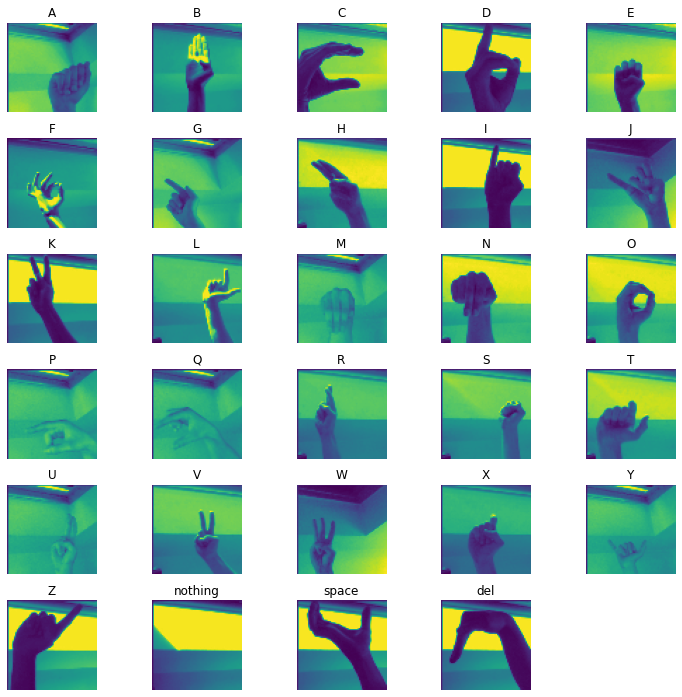

In [7]:
plt.figure(figsize=(10,10))
j=0
i=0
#made this loop to show a single picture of each class.
while j != 29:
    if([j] == y_train[i]): #finds a new label and draws the subplot.
        j = j+1
        plt.subplot(6,5,j)
        plt.tight_layout(pad = 1)
        plt.imshow(x_train[i])
        plt.title(classes[y_train[i][0]]) #doing this so that the labels are not just numbers.
        plt.axis('off')
    i = i+1

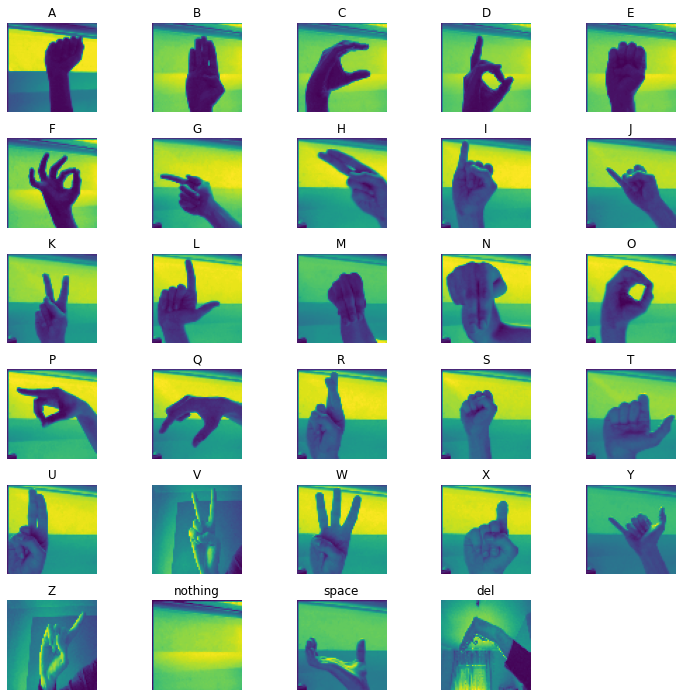

In [8]:
plt.figure(figsize=(10,10))
j=0
i=0
while j != 29:
    if([j] == y_test[i]): 
        j = j+1
        plt.subplot(6,5,j)
        plt.tight_layout(pad = 1)
        plt.imshow(x_test[i])
        plt.title(classes[y_test[i][0]]) 
        plt.axis('off')
    i = i+1

In [9]:
model =Sequential()
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

model.add(Conv2D(32,(3,3), input_shape = (64,64,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64,(3,3), input_shape = (64,64,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(96,(3,3), input_shape = (64,64,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 29, activation = 'softmax'))
model.compile(optimizer = opt, loss = loss, metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 96)         0

In [10]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_valid = keras.utils.to_categorical(y_valid)

In [11]:
print(y_valid[0])
print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [12]:
x_train = np.array(x_train)
y_train = np.array(y_train) 
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [13]:
history = model.fit(x_train,
          y_train,
          epochs= epochs,
          batch_size = batches,
          validation_data = (x_valid,y_valid))

Epoch 1/10


2022-03-09 18:40:06.017803: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2030/2030 [==============================] - 67s 33ms/step - loss: 2.8766 - accuracy: 0.2125 - val_loss: 1.8267 - val_accuracy: 0.4526
Epoch 2/10
2030/2030 [==============================] - 73s 36ms/step - loss: 1.1581 - accuracy: 0.6433 - val_loss: 0.6902 - val_accuracy: 0.7825
Epoch 3/10
2030/2030 [==============================] - 77s 38ms/step - loss: 0.4670 - accuracy: 0.8535 - val_loss: 0.3107 - val_accuracy: 0.9043
Epoch 4/10
2030/2030 [==============================] - 77s 38ms/step - loss: 0.2255 - accuracy: 0.9300 - val_loss: 0.2346 - val_accuracy: 0.9224
Epoch 5/10
2030/2030 [==============================] - 78s 38ms/step - loss: 0.1260 - accuracy: 0.9617 - val_loss: 0.1336 - val_accuracy: 0.9572
Epoch 6/10
2030/2030 [==============================] - 79s 39ms/step - loss: 0.0805 - accuracy: 0.9753 - val_loss: 0.0563 - val_accuracy: 0.9844
Epoch 7/10
2030/2030 [==============================] - 79s 39ms/step - loss: 0.0548 - accuracy: 0.9840 - val_loss: 0.0472 - val_accura

In [14]:
model.save_weights(filename)

In [15]:
model.load_weights(filename)

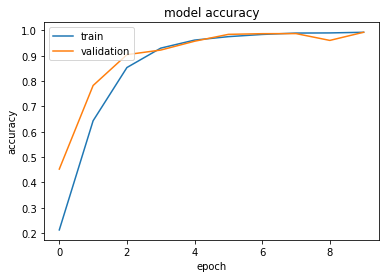

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

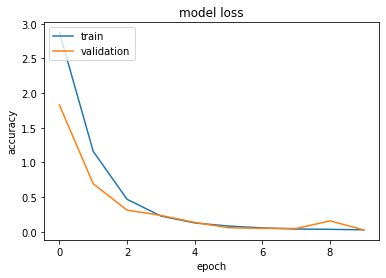

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

In [18]:
uniq_labels = np.unique(labels)
#Helper function to plot confusion matrix
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

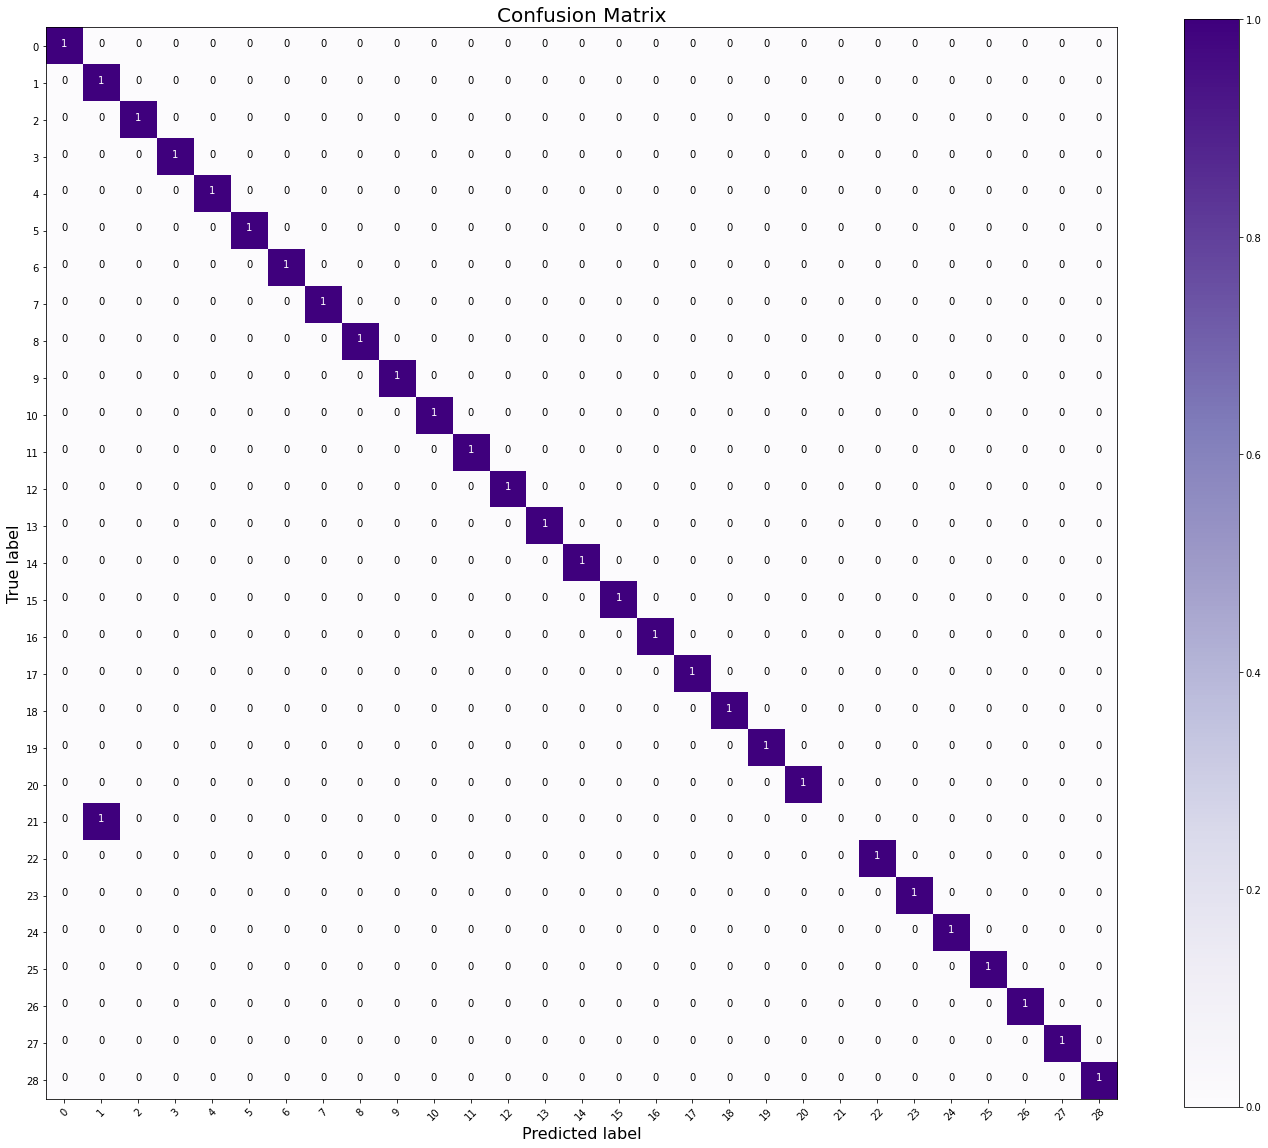

In [19]:
from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model.predict(x_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)

In [20]:
score = model.evaluate(x = x_valid, y = y_valid, verbose = 0)
print('Accuracy for validation images:', round(score[1]*100, 3), '%')
score = model.evaluate(x = x_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

Accuracy for validation images: 99.272 %
Accuracy for test images: 96.552 %
